In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from models.eer_predict import eer_predict
from models.linear_hp import hp_invert

cwd = os.getcwd()

In [7]:
cwd = os.getcwd()
hourly_load = 'data/office_load_hourly.pkl'
load = 'data/office_load.pkl'
building_results = 'data/building_results.pkl'

# Load data
df_hourly_load = pd.read_pickle(os.path.join(cwd, hourly_load))
df_load = pd.read_pickle(os.path.join(cwd, load))
df_building_results = pd.read_pickle(os.path.join(cwd, building_results))

In [8]:
def baseline_scenario(total_df):
    baseline_results = pd.DataFrame(index=total_df.index)
    baseline_results['load'] = total_df['load']
    baseline_results['eer'] = [eer_predict(total_df['outdoor_temp'].values[i]) for i in range(len(total_df))]
    baseline_results['e_hp'] = df_load['Electricity Demand-TOT Cooling']
    baseline_results['e_price'] = total_df['e_price']

    baseline_results['rpm'] = [hp_invert(total_df['load'].values[i], total_df['outdoor_temp'].values[i])[0] for i in range(len(total_df))]

    return baseline_results


In [9]:
total_df_15T = pd.read_pickle(os.path.join(cwd, 'data', 'total_df.pkl'))
total_df_30T = pd.read_pickle(os.path.join(cwd, 'data', 'total_df_30T.pkl'))
total_df_1H = pd.read_pickle(os.path.join(cwd, 'data', 'total_df_hourly.pkl'))

In [10]:
baseline = baseline_scenario(total_df_15T)

baseline.to_pickle(os.path.join(cwd, 'results', 'baseline.pkl'))

In [11]:
cwd = os.getcwd()
hourly_load = 'data/office_load_hourly.pkl'
load = 'data/office_load.pkl'
building_results = 'data/building_results.pkl'

# Load data
df_hourly_load = pd.read_pickle(os.path.join(cwd, hourly_load))
df_load = pd.read_pickle(os.path.join(cwd, load))
df_building_results = pd.read_pickle(os.path.join(cwd, building_results))

In [12]:
df_load.columns

Index(['Hour_of_the_day          ', ' TIME                    ',
       'TOT-Total Electricity Demand', 'Electricity Demand-TOT Heating',
       'Electricity Demand-TOT Cooling',
       'Electricity Demand-TOT Electric Equipment',
       'Electricity Demand-TOT Lighting',
       'Thermal energy need for space cooling [kWh]',
       'Thermal power requirement for space cooling [kW]'],
      dtype='object')

<Axes: >

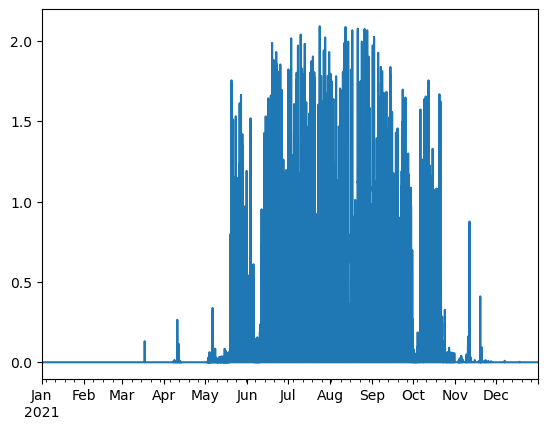

In [5]:
baseline_15T['e_hp'].plot()

<Axes: >

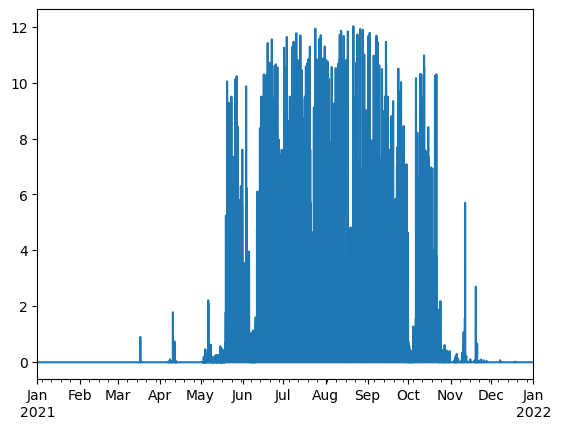

In [10]:
df_load['Thermal energy need for space cooling [kWh]'].plot()

In [11]:
df_load.columns

Index(['Hour_of_the_day          ', ' TIME                    ',
       'TOT-Total Electricity Demand', 'Electricity Demand-TOT Heating',
       'Electricity Demand-TOT Cooling',
       'Electricity Demand-TOT Electric Equipment',
       'Electricity Demand-TOT Lighting',
       'Thermal energy need for space cooling [kWh]',
       'Thermal power requirement for space cooling [kW]'],
      dtype='object')

<Axes: >

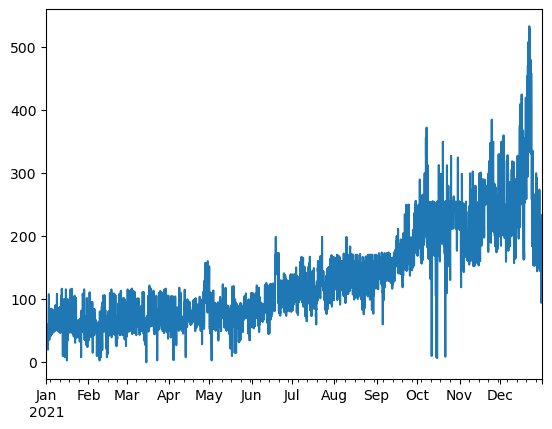

In [12]:
baseline_15T['e_price'].plot()